# Space Missions EDA 

## Importing Python Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")


## Reading and analyzing the data

In [6]:
df = pd.read_csv("D:/Projects/Space_data/Space_Corrected.csv")

In [7]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [9]:
df = df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [10]:
df.describe()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company Name    4324 non-null   object
 1   Location        4324 non-null   object
 2   Datum           4324 non-null   object
 3   Detail          4324 non-null   object
 4   Status Rocket   4324 non-null   object
 5    Rocket         964 non-null    object
 6   Status Mission  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


### 1. Launches by each country

In [12]:
ds = df["Company Name"].value_counts().reset_index()[:28]
ds

,index,Company Name
0,RVSN USSR,1777
1,Arianespace,279
2,CASC,251
3,General Dynamics,251
4,NASA,203
5,VKS RF,201
6,US Air Force,161
7,ULA,140
8,Boeing,136
9,Martin Marietta,114


In [14]:
fig = go.Figure(go.Bar(x=ds["index"],
                       y=ds["Company Name"],
                       marker=dict(color=ds["Company Name"],colorscale="bluered")))
fig.update_layout(title="Number of Launches by every company",xaxis_title="Top 28 Countries",yaxis_title="count",hovermode="x")
fig.show()

### 2. Rocket status

In [15]:
ds = df["Status Rocket"].value_counts().reset_index()
ds

,index,Status Rocket
0,StatusRetired,3534
1,StatusActive,790


In [16]:
fig = px.pie(ds,values="Status Rocket",names="index",title="Rocket Status")
fig.show()

### 3. Mission Status

In [17]:
ds = df["Status Mission"].value_counts().reset_index()[:3]
ds

,index,Status Mission
0,Success,3879
1,Failure,339
2,Partial Failure,102


In [18]:
fig = px.bar(ds,x="index",y="Status Mission",title="Mission Status")
fig.show()

### 4. Rocket Cost Distribution with Rocket Status

In [21]:
np.sum(pd.isna(df.loc[:," Rocket"]))

3360

In [62]:
df = df.dropna(subset=[" Rocket"],axis="rows")
len(df1)

964

In [63]:
np.sum(pd.isna(df.loc[:," Rocket"]))

0

In [64]:
df.loc[:," Rocket"]

0        50.0 
1       29.75 
3        65.0 
4       145.0 
5       64.68 
         ...  
3855     59.0 
3971    63.23 
3993    63.23 
4000    63.23 
4020    63.23 
Name:  Rocket, Length: 964, dtype: object

In [65]:
df.loc[:, " Rocket"] = df.loc[:, " Rocket"].fillna(0.0).str.replace(",","")
df.loc[:, " Rocket"] = df.loc[:, " Rocket"].astype(np.float64).fillna(0.0)

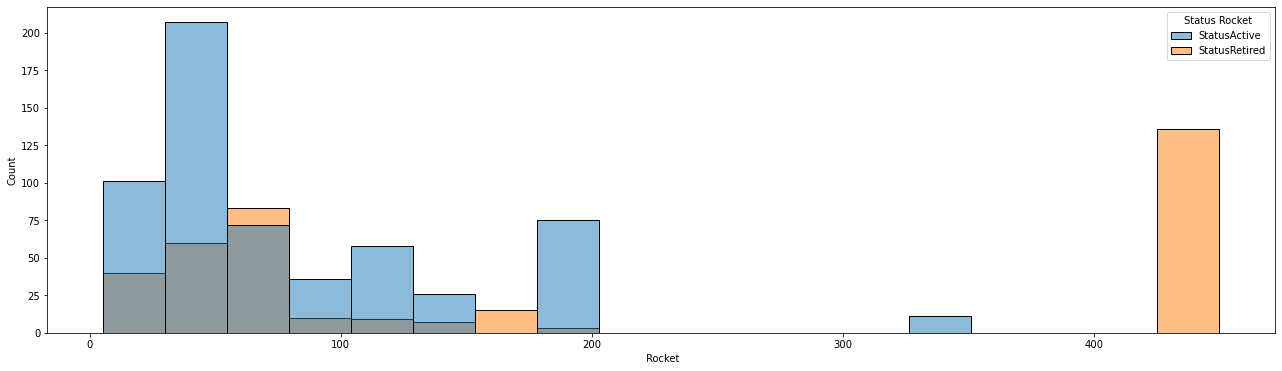

In [66]:
df = df[df.loc[:, " Rocket"]<1000]
plt.figure(figsize = (22,6))
sns.histplot(data = df, x = " Rocket", hue = "Status Rocket")
plt.show()

### 5. Rocket Cost Distribution with Mission Status

In [67]:
np.sum(pd.isna(df.loc[:,"Status Mission"]))

0

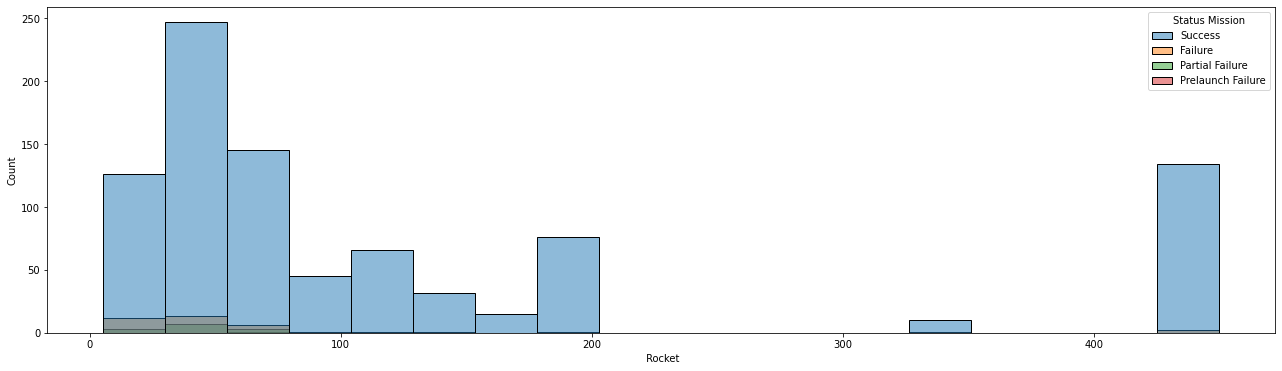

In [68]:
plt.figure(figsize = (22,6))
sns.histplot(data = df, x = " Rocket", hue = "Status Mission")
plt.show()

### 6. Total Spend Money for each Companies

In [69]:
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,date,year,country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020-08-07 05:12:00+00:00,2020,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020,China
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,2020-07-30 21:25:00+00:00,2020,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,2020-07-30 11:50:00+00:00,2020,USA
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,2020-07-25 03:13:00+00:00,2020,China


In [70]:
df_money = df.groupby(["Company Name"])[" Rocket"].sum().reset_index()
df_money = df_money[df_money[" Rocket"] > 0]
df_money.head()

,Company Name,Rocket
0,Arianespace,16345.00
1,Boeing,1241.00
2,CASC,6340.26
3,EER,20.00
4,ESA,37.00


In [71]:
df_money_ = df_money.sort_values(by = [" Rocket"], ascending = False)[:15]
df_money_.head()

,Company Name,Rocket
14,NASA,61200.00
0,Arianespace,16345.00
20,ULA,14798.00
2,CASC,6340.26
19,SpaceX,5444.00


In [38]:
fig = px.bar(df1_money_, x = "Company Name", y = " Rocket", title = "Total Spent Money for each Company")
fig.show()

### 7. Mission Numbers by Year

In [39]:
df["date"] = pd.to_datetime(df["Datum"])
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,date
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00


In [40]:
df["year"] = df["date"].apply(lambda datetime: datetime.year)
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,date,year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020


In [41]:
ds = df["year"].value_counts().reset_index()
ds

,index,year
0,1971,119
1,2018,117
2,1977,114
3,1975,113
4,1976,113
...,...,...
59,2010,37
60,2005,37
61,1958,28
62,1959,20


In [42]:
fig = px.bar(ds, x = "index", y = "year", title = "Missions Number by Year")
fig.show()

### 8. Countries and Mission Status

In [43]:
encoder = LabelEncoder()
encoder.fit(df["Status Mission"])
encoder

LabelEncoder()

In [44]:
colors = {0: "red", 
          1 : "Orange", 
          2 : "Yellow", 
          3 : "Green"}
colors

{0: 'red', 1: 'Orange', 2: 'Yellow', 3: 'Green'}

In [45]:
countries_dict = {
    'Russia' : 'Russian Federation',
    'New Mexico' : 'USA',
    "Yellow Sea": 'China',
    "Shahrud Missile Test Site": "Iran",
    "Pacific Missile Range Facility": 'USA',
    "Barents Sea": 'Russian Federation',
    "Gran Canaria": 'USA'
}
df["country"] = df["Location"].str.split(", ").str[-1].replace(countries_dict)
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,date,year,country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020,USA


In [46]:
fig = make_subplots(rows = 4, cols = 4, subplot_titles = df["country"].unique())
for i, country in enumerate(df["country"].unique()):
    counts = df[df["country"] == country]["Status Mission"].value_counts(normalize = True)*100
    color = [colors[x] for x in encoder.transform(counts.index)]
    trace = go.Bar(x = counts.index, y = counts.values, name = country, marker = {"color" : color}, showlegend = False)
    fig.add_trace(trace, row = (i//4) + 1, col = (i%4)+1)
fig.update_layout(title = {"text":"Countries and Mission Status"}, height = 1000, width = 1100)
for i in range(1,5):
    fig.update_yaxes(title_text = "Percentage", row = i, col = 1)
fig.show()

### 9. Sunburst Chart Analysis

In [47]:
sun = df.groupby(["country","Company Name","Status Mission"])["Datum"].count().reset_index()
sun.head()

,country,Company Name,Status Mission,Datum
0,Australia,AMBA,Success,1
1,Australia,CECLES,Failure,2
2,Australia,CECLES,Success,1
3,Australia,RAE,Failure,1
4,Australia,RAE,Success,1


In [48]:
sun = sun[(sun.country == "USA") | (sun.country == "China") | (sun.country == "Russian Federation") | (sun.country == "France")]
sun.head()

,country,Company Name,Status Mission,Datum
7,China,CASC,Failure,14
8,China,CASC,Partial Failure,6
9,China,CASC,Success,231
10,China,CASIC,Failure,2
11,China,CASIC,Success,3


In [49]:
fig = px.sunburst(sun, path = ["country", "Company Name", "Status Mission"], values = "Datum", title = "Sunburst Chart for some Countries")
fig.show()

# Space Exploration Predictions

In [72]:
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,date,year,country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020-08-07 05:12:00+00:00,2020,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020,China
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,2020-07-30 21:25:00+00:00,2020,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,2020-07-30 11:50:00+00:00,2020,USA
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,2020-07-25 03:13:00+00:00,2020,China


In [ ]:
df=df.drop(['Location','date','Detail','Datum'],axis=1)

In [80]:
df.head()

,Company Name,Status Rocket,Rocket,Status Mission,year,country
0,SpaceX,StatusActive,50.00,Success,2020,USA
1,CASC,StatusActive,29.75,Success,2020,China
3,Roscosmos,StatusActive,65.00,Success,2020,Kazakhstan
4,ULA,StatusActive,145.00,Success,2020,USA
5,CASC,StatusActive,64.68,Success,2020,China


In [81]:
df['Status Mission'].value_counts()

Success              896
Failure               36
Partial Failure       16
Prelaunch Failure      1
Name: Status Mission, dtype: int64

In [83]:
df['Status Mission'] =df['Status Mission'].apply(lambda x: x if x == 'Success' else 'Failure')
df['Status Mission'].value_counts()

Success    896
Failure     53
Name: Status Mission, dtype: int64

In [84]:
df['Status Mission'] = encoder.fit_transform(df['Status Mission'])

In [85]:
df[:10]

,Company Name,Status Rocket,Rocket,Status Mission,year,country
0,SpaceX,StatusActive,50.00,1,2020,USA
1,CASC,StatusActive,29.75,1,2020,China
3,Roscosmos,StatusActive,65.00,1,2020,Kazakhstan
4,ULA,StatusActive,145.00,1,2020,USA
5,CASC,StatusActive,64.68,1,2020,China
6,Roscosmos,StatusActive,48.50,1,2020,Kazakhstan
8,SpaceX,StatusActive,50.00,1,2020,USA
9,JAXA,StatusActive,90.00,1,2020,Japan
10,Northrop,StatusActive,46.00,1,2020,USA
11,ExPace,StatusActive,28.30,0,2020,China


In [86]:
df['Status Mission'].value_counts()

1    896
0     53
Name: Status Mission, dtype: int64

### Encoding string values

In [87]:
encoder = LabelEncoder()
df['Status Rocket']=encoder.fit_transform(df['Status Rocket'])

In [89]:
df.head()

,Company Name,Status Rocket,Rocket,Status Mission,year,country
0,SpaceX,0,50.00,1,2020,USA
1,CASC,0,29.75,1,2020,China
3,Roscosmos,0,65.00,1,2020,Kazakhstan
4,ULA,0,145.00,1,2020,USA
5,CASC,0,64.68,1,2020,China


In [90]:
df['Status Rocket'].value_counts()

0    586
1    363
Name: Status Rocket, dtype: int64

In [91]:
df=df.drop(['Company Name'],axis=1)

In [92]:
df.head()

,Status Rocket,Rocket,Status Mission,year,country
0,0,50.00,1,2020,USA
1,0,29.75,1,2020,China
3,0,65.00,1,2020,Kazakhstan
4,0,145.00,1,2020,USA
5,0,64.68,1,2020,China


### One Hot encoding the Country Column

In [93]:
def onehot_encode(data, column):
    dummies = pd.get_dummies(data[column])
    data = pd.concat([data, dummies], axis=1)
    data.drop(column, axis=1, inplace=True)
    return data

In [95]:
df=onehot_encode(df,'country')

In [96]:
df.head()

,Status Rocket,Rocket,Status Mission,year,China,France,India,Japan,Kazakhstan,New Zealand,Russian Federation,USA
0,0,50.00,1,2020,0,0,0,0,0,0,0,1
1,0,29.75,1,2020,1,0,0,0,0,0,0,0
3,0,65.00,1,2020,0,0,0,0,1,0,0,0
4,0,145.00,1,2020,0,0,0,0,0,0,0,1
5,0,64.68,1,2020,1,0,0,0,0,0,0,0


In [97]:
X=df.drop('Status Mission',axis=1)
y=df['Status Mission']

In [98]:
y.head()

0    1
1    1
3    1
4    1
5    1
Name: Status Mission, dtype: int32

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,random_state=101)
X_train.head()

,Status Rocket,Rocket,year,China,France,India,Japan,Kazakhstan,New Zealand,Russian Federation,USA
117,0,48.5,2019,0,0,0,0,0,0,1,0
1546,1,25.0,1994,0,0,1,0,0,0,0,0
268,0,90.0,2018,0,0,0,1,0,0,0,0
1793,1,450.0,1990,0,0,0,0,0,0,0,1
111,0,7.5,2019,1,0,0,0,0,0,0,0


### Preprocessing

In [100]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

In [101]:
scaled_X_train

array([[-0.78709097, -0.59006955,  0.92349493, ..., -0.12365484,
         4.11654539, -1.        ],
       [ 1.27050117, -0.751995  , -1.18054238, ..., -0.12365484,
        -0.24292214, -1.        ],
       [-0.78709097, -0.3041161 ,  0.83933344, ..., -0.12365484,
        -0.24292214, -1.        ],
       ...,
       [-0.78709097, -0.17319765,  0.67101046, ..., -0.12365484,
        -0.24292214,  1.        ],
       [-0.78709097,  0.4538328 ,  0.1660415 , ..., -0.12365484,
        -0.24292214, -1.        ],
       [ 1.27050117,  2.17644394, -1.43302686, ..., -0.12365484,
        -0.24292214,  1.        ]])

### Predicting the Model

In [102]:
from sklearn.linear_model import LogisticRegressionCV
log_model=LogisticRegressionCV()
log_model.fit(scaled_X_train,y_train)

LogisticRegressionCV()

In [103]:
y_pred=log_model.predict(scaled_X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [104]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,y_pred)

0.9333333333333333

In [105]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.93      1.00      0.97       266

    accuracy                           0.93       285
   macro avg       0.47      0.50      0.48       285
weighted avg       0.87      0.93      0.90       285



### The classification report shows that the accuracy is 93%